In [1]:
import glob
import pandas as pd
import moles

import matplotlib.pyplot as plt

In [2]:
mol_info = []
table = []

for i in glob.glob('mol2_files/*.mol2'):
    
    mol2 = moles.parse_mol2(i)
    
    db = moles.Datablocks(mol2)
    
    basic_info = db.mol_info()
    
    mol_info.append(basic_info[0][0])
    mol_info.append(basic_info[1][0])
    mol_info.append(basic_info[1][1])
    
    drug = moles.Chem_Info(db.atom_info(), db.bond_info())
    
    mol_info.append(drug.molar_mass())
    mol_info.append(drug.HB_donor())
    mol_info.append(drug.HB_acceptor())
    mol_info.append(drug.net_charge())
    
    for j in range(len(drug.atom_count())):
        mol_info.append(drug.atom_count()[j])
        
    table.append(mol_info)
    mol_info = []

molecules = pd.DataFrame(table, columns = ['Molecule ID', '# of Atoms', '# of Bonds',
                                           'Molar Mass', 'HB Donors', 'HB Acceptors',
                                           'Net Charge', 'Carbons', 'Hydrogens',
                                           'Nitrogens', 'Oxygens', 'Halogens',
                                           'Sulfurs', 'Phosph.', 'Other'])
    
molecules

,Molecule ID,# of Atoms,# of Bonds,Molar Mass,HB Donors,HB Acceptors,Net Charge,Carbons,Hydrogens,Nitrogens,Oxygens,Halogens,Sulfurs,Phosph.,Other
0,ZINC03831061,50,53,300.442,1,2,0,20,28,0,2,0,0,0,0
1,ZINC18085533,16,17,167.190,4,5,0,5,5,5,0,0,1,0,0
2,ZINC01843099,56,58,390.464,4,9,1,19,28,5,4,0,0,0,0
3,ZINC00001204,27,27,184.687,3,1,1,11,15,1,0,0,0,0,0
4,ZINC00001268,44,45,274.384,1,3,1,17,24,1,2,0,0,0,0
5,ZINC04574571,55,58,443.432,8,10,1,22,23,2,8,0,0,0,0
6,ZINC11592603,48,51,298.426,1,2,0,20,26,0,2,0,0,0,0
7,ZINC03830626,30,31,243.219,5,8,0,9,13,3,5,0,0,0,0
8,ZINC03861768,29,30,244.207,5,9,0,8,12,4,5,0,0,0,0
9,ZINC00897369,20,20,198.138,3,8,0,6,6,4,4,0,0,0,0


In [3]:
molecules['Molar Mass'].describe()

count    2894.000000
mean      331.460798
std       114.811935
min        59.044000
25%       254.250750
50%       322.401000
75%       401.496750
max       821.129000
Name: Molar Mass, dtype: float64

In [ ]:
small_molecules = molecules.to_csv('zdd_fda_approved.csv')

In [4]:
test1 = molecules.loc[molecules['Molar Mass'] <= 500]
test2 = test1.loc[molecules['HB Donors'] <= 5]
test3 = test2.loc[molecules['HB Acceptors'] <= 10]
test3

,Molecule ID,# of Atoms,# of Bonds,Molar Mass,HB Donors,HB Acceptors,Net Charge,Carbons,Hydrogens,Nitrogens,Oxygens,Halogens,Sulfurs,Phosph.,Other
0,ZINC03831061,50,53,300.442,1,2,0,20,28,0,2,0,0,0,0
1,ZINC18085533,16,17,167.190,4,5,0,5,5,5,0,0,1,0,0
2,ZINC01843099,56,58,390.464,4,9,1,19,28,5,4,0,0,0,0
3,ZINC00001204,27,27,184.687,3,1,1,11,15,1,0,0,0,0,0
4,ZINC00001268,44,45,274.384,1,3,1,17,24,1,2,0,0,0,0
6,ZINC11592603,48,51,298.426,1,2,0,20,26,0,2,0,0,0,0
7,ZINC03830626,30,31,243.219,5,8,0,9,13,3,5,0,0,0,0
8,ZINC03861768,29,30,244.207,5,9,0,8,12,4,5,0,0,0,0
9,ZINC00897369,20,20,198.138,3,8,0,6,6,4,4,0,0,0,0
10,ZINC02021931,56,56,368.454,3,8,1,18,30,3,5,0,0,0,0


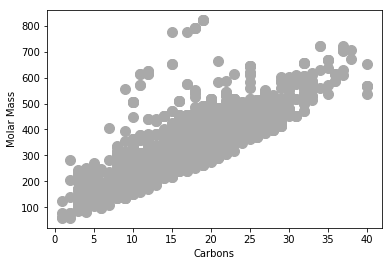

In [5]:
molecules.plot(kind='scatter', x='Carbons', y='Molar Mass', c=['darkgray'], s=100)

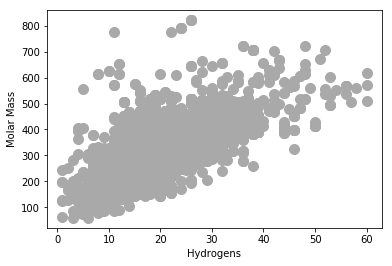

In [6]:
molecules.plot(kind='scatter', x='Hydrogens', y='Molar Mass', c=['darkgray'], s=100)

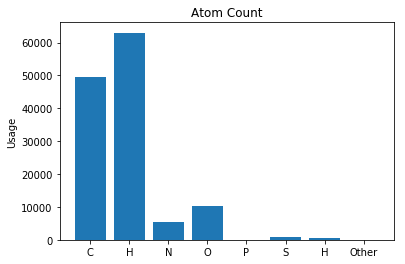

In [7]:
import numpy as np

# Data to plot
labels = ('C', 'H', 'N', 'O', 'P', 'S', 'H', 'Other')
y_pos = np.arange(len(labels))
amount = [molecules['Carbons'].sum(),
          molecules['Hydrogens'].sum(),
          molecules['Nitrogens'].sum(),
          molecules['Oxygens'].sum(),
          molecules['Phosph.'].sum(),
          molecules['Sulfurs'].sum(),
          molecules['Halogens'].sum(),
          molecules['Other'].sum()]

# Plot
plt.bar(y_pos, amount, width=0.8, align='center', alpha=1.0)
plt.xticks(y_pos, labels)
plt.ylabel('Usage')
plt.title('Atom Count')
 
plt.show()